<a href="https://colab.research.google.com/github/borbysh/Momentum-QNG/blob/main/min_vertex_cover_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
#!pip install pennylane
#!pip install qulacs pennylane-qulacs
#!pip install seaborn
#!pip install lightning
#!pip install ipynbname

In [2]:
sessions = [
    {"optimizer" : "QNGOptimizer",
     "params" : {"approx" : 'block-diag', "lam" : 0},
     "params_name" : "approx='block-diag', $\mathit{"+ chr(955) + "}$=0",
     "stepsizes" : [0.01,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25],
     "dev" : "default.qubit"},
    {"optimizer" :  "AdamOptimizer",
     "params" : {"beta1" : 0.9, "beta2" : 0.99, "epsilon" : 1.0e-8},
     "params_name" : "$\mathit{"+ chr(946) + "}_1$=0.9, $\mathit{"+ chr(946) + "}_2$=0.99, $\mathit{"+ chr(949) +"}$=$10^{-8}$",
     "stepsizes" : [0.01,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25],
     "dev" : "default.qubit"},
    {"optimizer" :  "MomentumOptimizer",
     "params" : {"momentum" : 0.9},
     "params_name" : "$\mathit{"+ chr(961) +"}$=0.9",
     "stepsizes" : [0.001,0.003,0.005,0.007,0.009,0.011,0.013,0.015,0.017,0.019,0.021],
     "dev" : "default.qubit"},
    {"optimizer" :  "MomentumQNGOptimizer",
     "params" : {"momentum" : 0.9, "approx" : 'block-diag', "lam" : 0},
     "params_name" : "$\mathit{"+ chr(961) +"}$=0.9, approx='block-diag', $\mathit{"+ chr(955) + "}$=0",
     "stepsizes" : [0.01,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25],
     "dev" : "default.qubit"}
]

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mbrat\AppData\Local\Temp\ipykernel_16548\276055245.py:4: SyntaxWarning: invalid escape sequence '\m'
  "params_name" : "approx='block-diag', $\mathit{"+ chr(955) + "}$=0",
C:\Users\mbrat\AppData\Local\Temp\ipykernel_16548\276055245.py:9: SyntaxWarning: invalid escape sequence '\m'
  "

In [3]:
init_count = 200
steps = 300

cost_tolerance = 0.001
cost_tolerance_count = 3



In [4]:
sessions_params = []
sessions_steps = []
sessions_costs = []
sessions_quality = []
sessions_asym = []
file1_name = "../qng/1/qng_mvcp_8_quality_depth=6_2025-02-08.dat"
file2_name = "../qng/2/qng_mvcp_8_quality_depth=6_2025-02-09.dat"
file3_name = "../qng/3/qng_mvcp_8_quality_depth=6_2025-02-08.dat"
fileout_name = "qng_mvcp_8_quality_depth=6.dat"
file1 = open(file1_name, "r")
file2 = open(file2_name, "r")
file3 = open(file3_name, "r")
fout = open(fileout_name,"w")
f1lines = file1.readlines()
f2lines = file2.readlines()
f3lines = file3.readlines()
qng_quality = []
stepsizes_count = len(f1lines[0].split()) + len(f2lines[0].split()) + len(f3lines[0].split()) - 3
for i in range(stepsizes_count):
    stepsize_quality = [0]*init_count
    qng_quality.append(stepsize_quality)
'''
line1 = f1lines[0].split()
line2 = f2lines[0].split()
stepsizes = [0]*stepsizes_count
counter = 0
for j in range(1,len(line1)):
    stepsizes[counter] = float(line1[j])
    counter += 1
for j in range(1,len(line2)):
    stepsizes[counter] = float(line2[j])
    counter += 1        

#sessions[0]["stepsizes"] = stepsizes
'''
for i in range(0,len(f1lines)):
    line1 = f1lines[i].split()
    line2 = f2lines[i].split()
    line3 = f3lines[i].split()
    line = ""
    counter = 0
    for j in range(1,len(line1)):
        line += line1[j] + " "
        qng_quality[counter][i-1] = float(line1[j])
        counter += 1
    for j in range(1,len(line2)):
        line += line2[j] + " "
        qng_quality[counter][i-1] = float(line2[j])
        counter += 1        
    for j in range(1,len(line3)):
        line += line3[j] + " "
        qng_quality[counter][i-1] = float(line3[j])
        counter += 1        
    print(i,line,file=fout)

sessions_quality.append(qng_quality)



file1_name = "../adam/1/adam_mvcp_8_quality_depth=6_2025-02-06.dat"
#file2_name = "../adam/2/adam_mvcp_12_quality_depth=4_2025-02-01.dat"
fileout_name = "adam_mvcp_8_quality_depth=6.dat"
file1 = open(file1_name, "r")
#file2 = open(file2_name, "r")
fout = open(fileout_name,"w")
f1lines = file1.readlines()
#f2lines = file2.readlines()
adam_quality = []
stepsizes_count = len(f1lines[0].split()) - 1 # + len(f2lines[0].split()) - 2
for i in range(stepsizes_count):
    stepsize_quality = [0]*init_count
    adam_quality.append(stepsize_quality)
'''    
line1 = f1lines[0].split()
line2 = f2lines[0].split()
stepsizes = [0]*stepsizes_count
counter = 0
for j in range(1,len(line1)):
    stepsizes[counter] = float(line1[j])
    counter += 1
for j in range(1,len(line2)):
    stepsizes[counter] = float(line2[j])
    counter += 1        

#sessions[1]["stepsizes"] = stepsizes
'''
for i in range(0,len(f1lines)):
    line1 = f1lines[i].split()
    #line2 = f2lines[i].split()
    line = ""
    counter = 0
    for j in range(1,len(line1)):
        line += line1[j] + " "
        adam_quality[counter][i-1] = float(line1[j])
        counter += 1
#    for j in range(1,len(line2)):
#        line += line2[j] + " "
#        adam_quality[counter][i-1] = float(line2[j])
#        counter += 1        
    print(i,line,file=fout)

sessions_quality.append(adam_quality)


file1_name = "../mom/2/mom_mvcp_8_quality_depth=6_2025-02-10.dat"
#file2_name = "../mom/2/mom_mvcp_12_quality_depth=4_2025-02-01.dat"
fileout_name = "mom_mvcp_8_quality_depth=6.dat"
file1 = open(file1_name, "r")
#file2 = open(file2_name, "r")
fout = open(fileout_name,"w")
f1lines = file1.readlines()
#f2lines = file2.readlines()
mom_quality = []
stepsizes_count = len(f1lines[0].split()) -1 #+ len(f2lines[0].split()) - 2
for i in range(stepsizes_count):
    stepsize_quality = [0]*init_count
    mom_quality.append(stepsize_quality)
'''
line1 = f1lines[0].split()
line2 = f2lines[0].split()
stepsizes = [0]*stepsizes_count
counter = 0
for j in range(1,len(line1)):
    stepsizes[counter] = float(line1[j])
    counter += 1
for j in range(1,len(line2)):
    stepsizes[counter] = float(line2[j])
    counter += 1        

#sessions[2]["stepsizes"] = stepsizes
'''

for i in range(0,len(f1lines)):
    line1 = f1lines[i].split()
    #line2 = f2lines[i].split()
    line = ""
    counter = 0
    for j in range(1,len(line1)):
        line += line1[j] + " "
        mom_quality[counter][i-1] = float(line1[j])
        counter += 1
#    for j in range(1,len(line2)):
#        line += line2[j] + " "
#        mom_quality[counter][i-1] = float(line2[j])
#        counter += 1        
    print(i,line,file=fout)

sessions_quality.append(mom_quality)

file1_name = "../momqng/1/momqng_mvcp_8_quality_depth=6_2025-02-07.dat"
file2_name = "../momqng/2/momqng_mvcp_8_quality_depth=6_2025-02-08.dat"
file3_name = "../momqng/3/momqng_mvcp_8_quality_depth=6_2025-02-08.dat"
fileout_name = "momqng_mvcp_8_quality_depth=6.dat"
file1 = open(file1_name, "r")
file2 = open(file2_name, "r")
file3 = open(file3_name, "r")
fout = open(fileout_name,"w")
f1lines = file1.readlines()
f2lines = file2.readlines()
f3lines = file3.readlines()
momqng_quality = []
stepsizes_count = len(f1lines[0].split()) + len(f2lines[0].split()) + len(f3lines[0].split()) - 3
for i in range(stepsizes_count):
    stepsize_quality = [0]*init_count
    momqng_quality.append(stepsize_quality)
'''
line1 = f1lines[0].split()
line2 = f2lines[0].split()
stepsizes = [0]*stepsizes_count
counter = 0
for j in range(1,len(line1)):
    stepsizes[counter] = float(line1[j])
    counter += 1
for j in range(1,len(line2)):
    stepsizes[counter] = float(line2[j])
    counter += 1        

#sessions[0]["stepsizes"] = stepsizes
'''
for i in range(0,len(f1lines)):
    line1 = f1lines[i].split()
    line2 = f2lines[i].split()
    line3 = f3lines[i].split()
    line = ""
    counter = 0
    for j in range(1,len(line1)):
        line += line1[j] + " "
        momqng_quality[counter][i-1] = float(line1[j])
        counter += 1
    for j in range(1,len(line2)):
        line += line2[j] + " "
        momqng_quality[counter][i-1] = float(line2[j])
        counter += 1        
    for j in range(1,len(line3)):
        line += line3[j] + " "
        momqng_quality[counter][i-1] = float(line3[j])
        counter += 1        
    print(i,line,file=fout)

sessions_quality.append(momqng_quality)



In [5]:
file1_name = "../qng/1/qng_mvcp_8_steps_depth=6_2025-02-08.dat"
file2_name = "../qng/2/qng_mvcp_8_steps_depth=6_2025-02-09.dat"
file3_name = "../qng/3/qng_mvcp_8_steps_depth=6_2025-02-08.dat"
fileout_name = "qng_mvcp_8_steps_depth=6.dat"
file1 = open(file1_name, "r")
file2 = open(file2_name, "r")
file3 = open(file3_name, "r")
fout = open(fileout_name,"w")
f1lines = file1.readlines()
f2lines = file2.readlines()
f3lines = file3.readlines()
qng_steps = []
stepsizes_count = len(f1lines[0].split()) + len(f2lines[0].split()) + len(f3lines[0].split()) - 3
for i in range(stepsizes_count):
    stepsize_steps = [0]*init_count
    qng_steps.append(stepsize_steps)
'''
line1 = f1lines[0].split()
line2 = f2lines[0].split()
stepsizes = [0]*stepsizes_count
counter = 0
for j in range(1,len(line1)):
    stepsizes[counter] = float(line1[j])
    counter += 1
for j in range(1,len(line2)):
    stepsizes[counter] = float(line2[j])
    counter += 1        

#sessions[0]["stepsizes"] = stepsizes
'''
for i in range(0,len(f1lines)):
    line1 = f1lines[i].split()
    line2 = f2lines[i].split()
    line3 = f3lines[i].split()
    line = ""
    counter = 0
    for j in range(1,len(line1)):
        line += line1[j] + " "
        qng_steps[counter][i-1] = float(line1[j])
        counter += 1
    for j in range(1,len(line2)):
        line += line2[j] + " "
        qng_steps[counter][i-1] = float(line2[j])
        counter += 1        
    for j in range(1,len(line3)):
        line += line3[j] + " "
        qng_steps[counter][i-1] = float(line3[j])
        counter += 1        
    print(i,line,file=fout)

sessions_steps.append(qng_steps)



file1_name = "../adam/1/adam_mvcp_8_steps_depth=6_2025-02-06.dat"
#file2_name = "../adam/2/adam_mvcp_12_quality_depth=4_2025-02-01.dat"
fileout_name = "adam_mvcp_8_steps_depth=6.dat"
file1 = open(file1_name, "r")
#file2 = open(file2_name, "r")
fout = open(fileout_name,"w")
f1lines = file1.readlines()
#f2lines = file2.readlines()
adam_steps = []
stepsizes_count = len(f1lines[0].split()) - 1 # + len(f2lines[0].split()) - 2
for i in range(stepsizes_count):
    stepsize_steps = [0]*init_count
    adam_steps.append(stepsize_steps)
'''    
line1 = f1lines[0].split()
line2 = f2lines[0].split()
stepsizes = [0]*stepsizes_count
counter = 0
for j in range(1,len(line1)):
    stepsizes[counter] = float(line1[j])
    counter += 1
for j in range(1,len(line2)):
    stepsizes[counter] = float(line2[j])
    counter += 1        

#sessions[1]["stepsizes"] = stepsizes
'''
for i in range(0,len(f1lines)):
    line1 = f1lines[i].split()
    #line2 = f2lines[i].split()
    line = ""
    counter = 0
    for j in range(1,len(line1)):
        line += line1[j] + " "
        adam_steps[counter][i-1] = float(line1[j])
        counter += 1
#    for j in range(1,len(line2)):
#        line += line2[j] + " "
#        adam_quality[counter][i-1] = float(line2[j])
#        counter += 1        
    print(i,line,file=fout)

sessions_steps.append(adam_steps)


file1_name = "../mom/2/mom_mvcp_8_steps_depth=6_2025-02-10.dat"
#file2_name = "../mom/2/mom_mvcp_12_quality_depth=4_2025-02-01.dat"
fileout_name = "mom_mvcp_8_steps_depth=6.dat"
file1 = open(file1_name, "r")
#file2 = open(file2_name, "r")
fout = open(fileout_name,"w")
f1lines = file1.readlines()
#f2lines = file2.readlines()
mom_steps = []
stepsizes_count = len(f1lines[0].split()) -1 #+ len(f2lines[0].split()) - 2
for i in range(stepsizes_count):
    stepsize_steps = [0]*init_count
    mom_steps.append(stepsize_steps)
'''
line1 = f1lines[0].split()
line2 = f2lines[0].split()
stepsizes = [0]*stepsizes_count
counter = 0
for j in range(1,len(line1)):
    stepsizes[counter] = float(line1[j])
    counter += 1
for j in range(1,len(line2)):
    stepsizes[counter] = float(line2[j])
    counter += 1        

#sessions[2]["stepsizes"] = stepsizes
'''

for i in range(0,len(f1lines)):
    line1 = f1lines[i].split()
    #line2 = f2lines[i].split()
    line = ""
    counter = 0
    for j in range(1,len(line1)):
        line += line1[j] + " "
        mom_steps[counter][i-1] = float(line1[j])
        counter += 1
#    for j in range(1,len(line2)):
#        line += line2[j] + " "
#        mom_quality[counter][i-1] = float(line2[j])
#        counter += 1        
    print(i,line,file=fout)

sessions_steps.append(mom_steps)

file1_name = "../momqng/1/momqng_mvcp_8_steps_depth=6_2025-02-07.dat"
file2_name = "../momqng/2/momqng_mvcp_8_steps_depth=6_2025-02-08.dat"
file3_name = "../momqng/3/momqng_mvcp_8_steps_depth=6_2025-02-08.dat"
fileout_name = "momqng_mvcp_8_steps_depth=6.dat"
file1 = open(file1_name, "r")
file2 = open(file2_name, "r")
file3 = open(file3_name, "r")
fout = open(fileout_name,"w")
f1lines = file1.readlines()
f2lines = file2.readlines()
f3lines = file3.readlines()
momqng_steps = []
stepsizes_count = len(f1lines[0].split()) + len(f2lines[0].split()) + len(f3lines[0].split()) - 3
for i in range(stepsizes_count):
    stepsize_steps = [0]*init_count
    momqng_steps.append(stepsize_steps)
'''
line1 = f1lines[0].split()
line2 = f2lines[0].split()
stepsizes = [0]*stepsizes_count
counter = 0
for j in range(1,len(line1)):
    stepsizes[counter] = float(line1[j])
    counter += 1
for j in range(1,len(line2)):
    stepsizes[counter] = float(line2[j])
    counter += 1        

#sessions[0]["stepsizes"] = stepsizes
'''
for i in range(0,len(f1lines)):
    line1 = f1lines[i].split()
    line2 = f2lines[i].split()
    line3 = f3lines[i].split()
    line = ""
    counter = 0
    for j in range(1,len(line1)):
        line += line1[j] + " "
        momqng_steps[counter][i-1] = float(line1[j])
        counter += 1
    for j in range(1,len(line2)):
        line += line2[j] + " "
        momqng_steps[counter][i-1] = float(line2[j])
        counter += 1        
    for j in range(1,len(line3)):
        line += line3[j] + " "
        momqng_steps[counter][i-1] = float(line3[j])
        counter += 1        
    print(i,line,file=fout)

sessions_steps.append(momqng_steps)




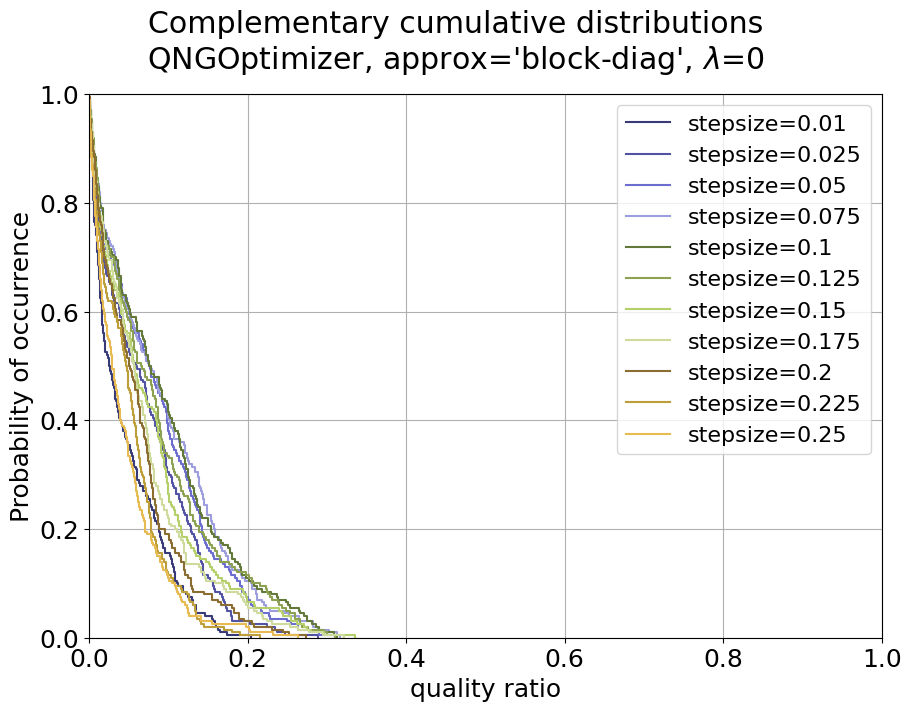

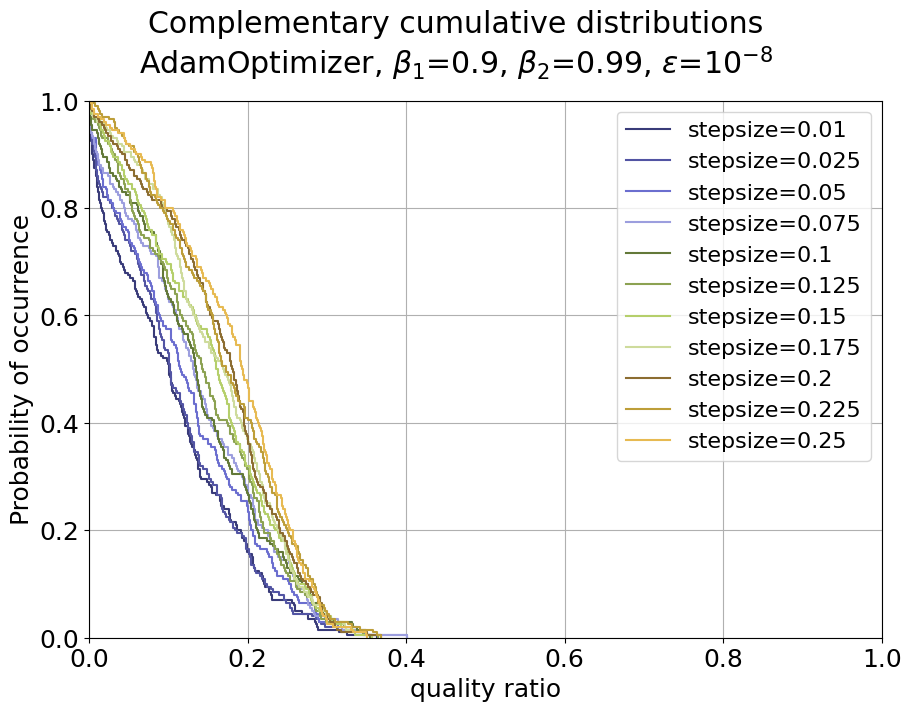

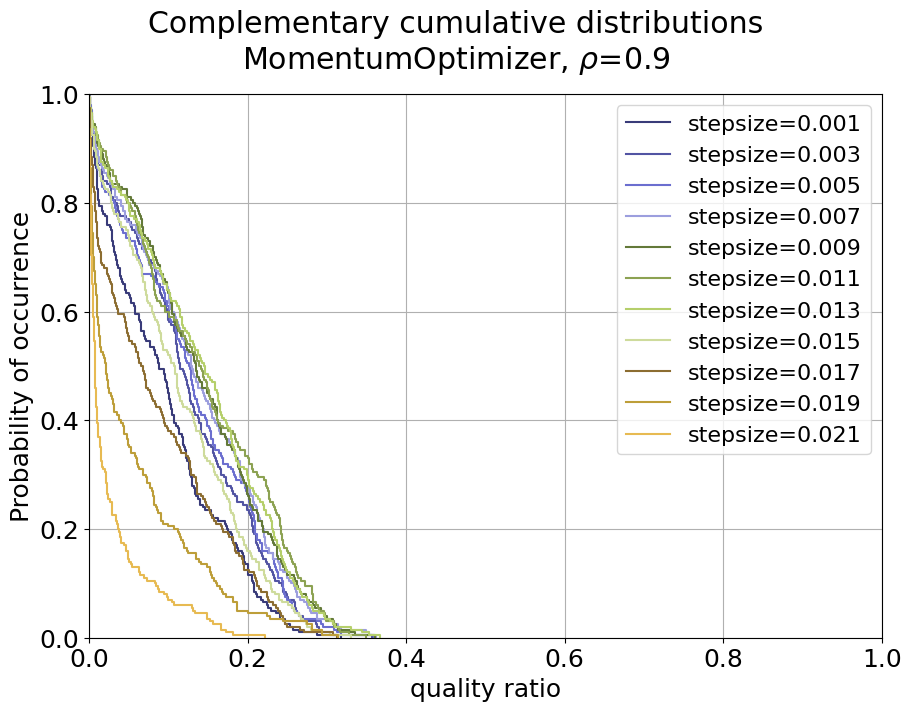

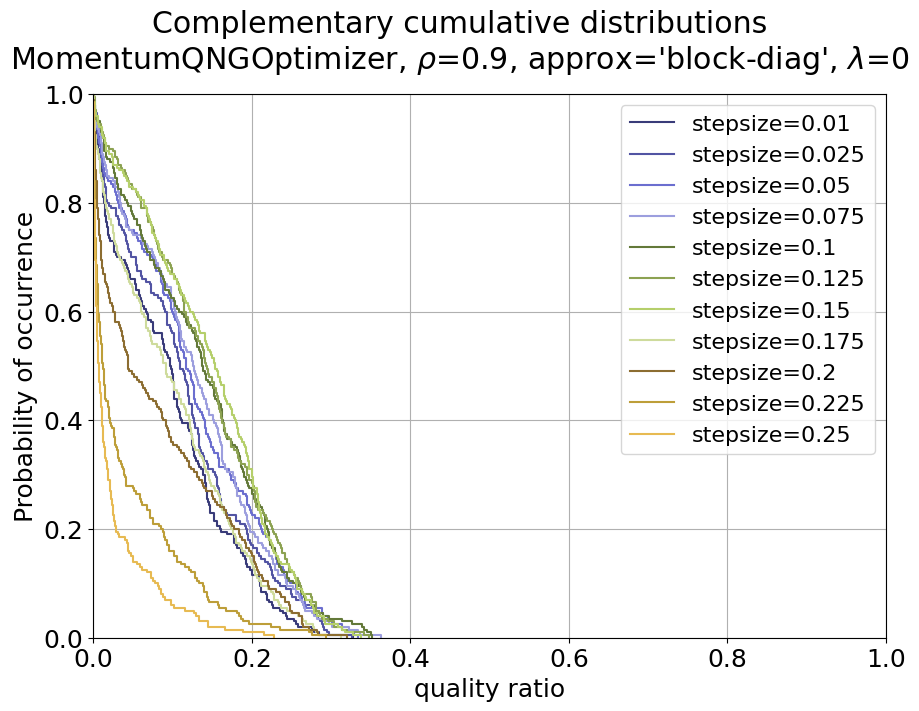

In [6]:
import matplotlib as mpl
from datetime import date
import ipynbname
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams['font.size'] = 18

prefix_name = ipynbname.name() + "_" #+ str(date.today()) + "_"
prefix_name = "mvc_8_"
cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 20))

for i,session in enumerate(sessions):
    fig = plt.figure(figsize=(9, 7), layout="compressed")
    axs = fig.subplots(1, 1, sharex=True, sharey=True)

    # Cumulative distributions.

    for j,stepsize in enumerate(session["stepsizes"]):
        #print(i,j,stepsize)
        axs.ecdf(sessions_quality[i][j],complementary=True, color=colors[j], label="stepsize="+str(stepsize) )

    # Label the figure.
    title = "Complementary cumulative distributions\n" + session["optimizer"]
    if(len(session["params_name"]) > 0):
        title += ", " + session["params_name"]

    fig.suptitle(title)

    axs.grid(True)
    axs.legend(fontsize=16)
    axs.set_xlabel("quality ratio")
    axs.set_ylabel("Probability of occurrence")
    axs.label_outer()
    axs.set_xlim(0.0, 1)
    plt.show()
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_quality.png",format='png',dpi=300)
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_quality.pdf",format='pdf',dpi=300)
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_quality.eps",format='eps',dpi=300)

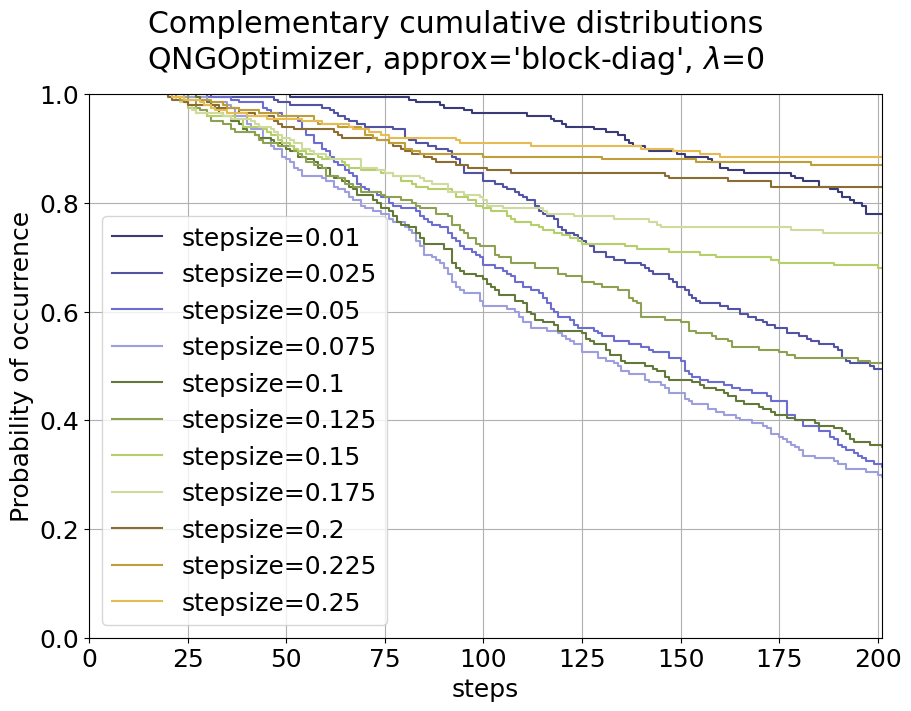

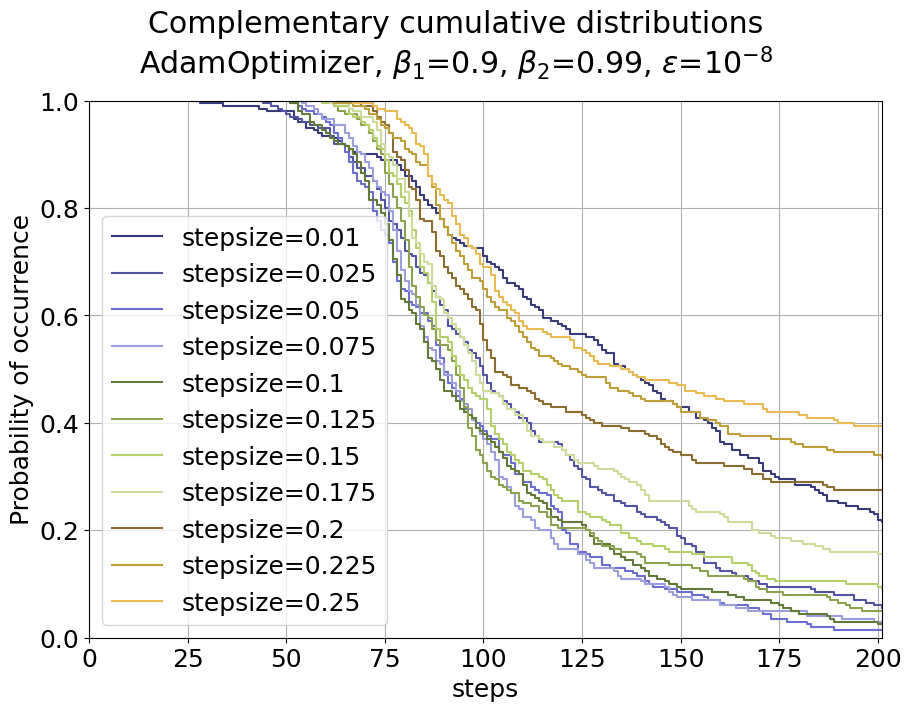

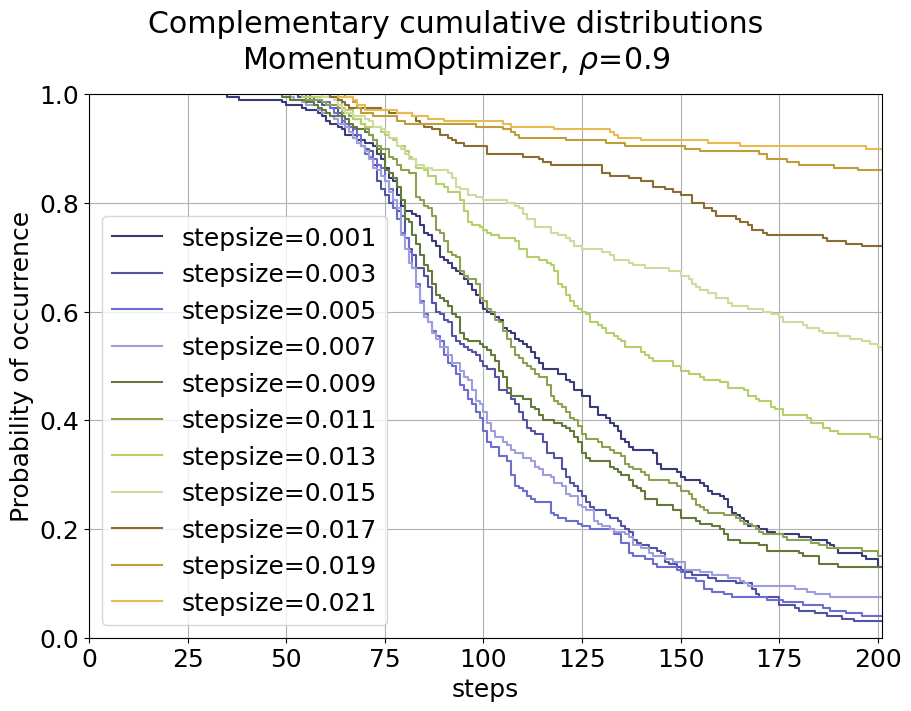

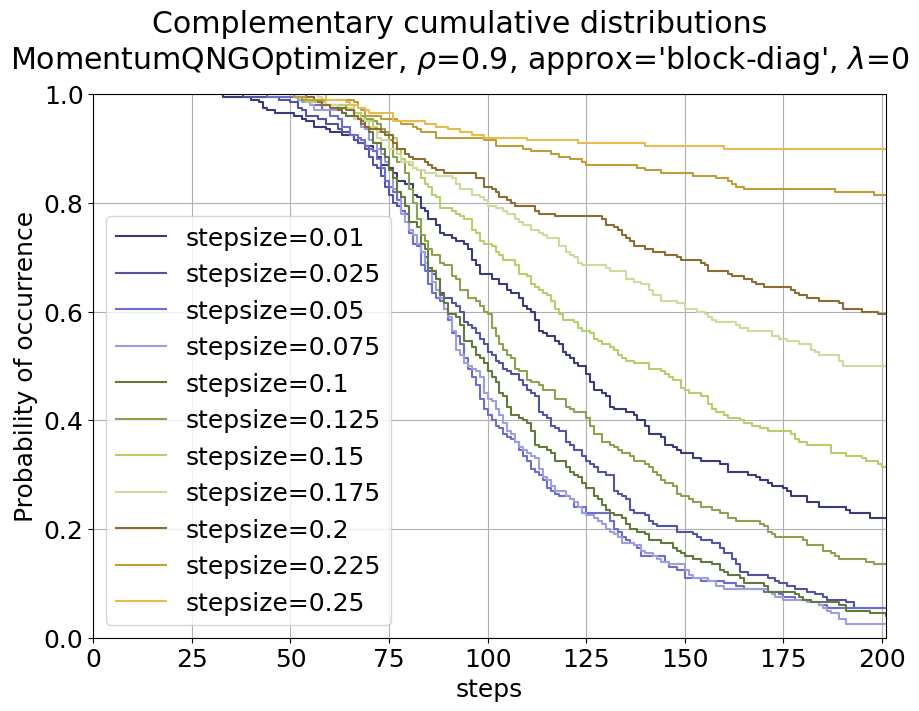

In [7]:
import matplotlib as mpl

cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 20))

for i,session in enumerate(sessions):
    fig = plt.figure(figsize=(9, 7), layout="compressed")
    axs = fig.subplots(1, 1, sharex=True, sharey=True)

    # Cumulative distributions.

    for j,stepsize in enumerate(session["stepsizes"]):
        axs.ecdf(sessions_steps[i][j],complementary=True, color=colors[j], label="stepsize="+str(stepsize) )

    # Label the figure.
    title = "Complementary cumulative distributions\n" + session["optimizer"]
    if(len(session["params_name"]) > 0):
        title += ", " + session["params_name"]

    fig.suptitle(title)

    axs.grid(True)
    axs.legend()
    axs.set_xlabel("steps")
    axs.set_ylabel("Probability of occurrence")
    axs.label_outer()
    axs.set_xlim(0.0, 201)
    plt.show()
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_steps.png",format='png',dpi=300)
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_steps.pdf",format='pdf',dpi=300)
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_steps.eps",format='eps',dpi=300)

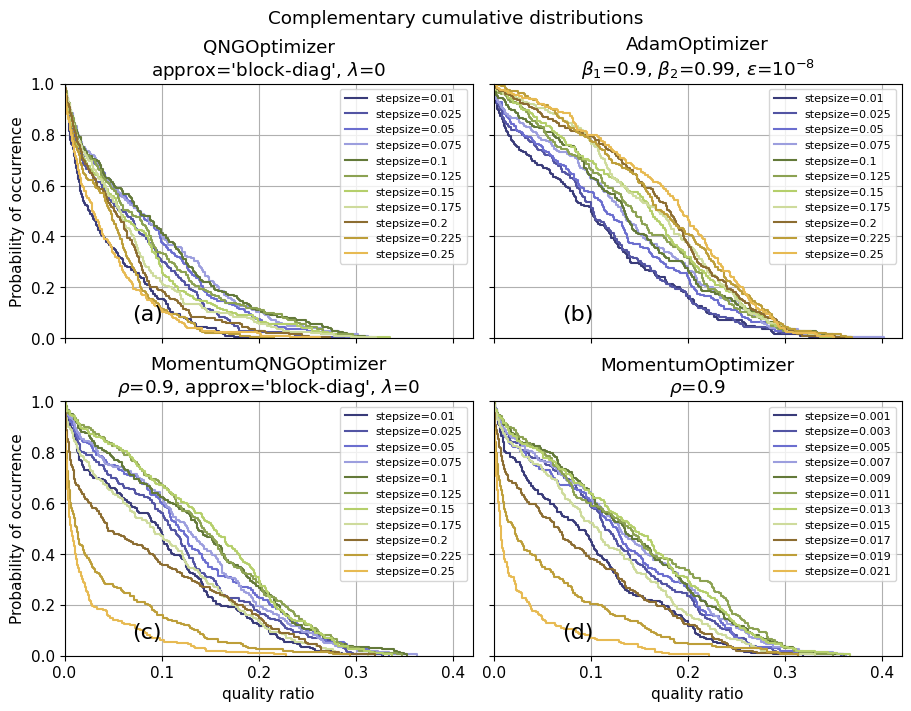

In [8]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 11

fig = plt.figure(figsize=(9, 7), layout="compressed")
axs = fig.subplots(2, 2, sharex=True, sharey=True)

# Cumulative distributions.
cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 20))

for j,stepsize in enumerate(sessions[0]["stepsizes"]):
    #print(j,stepsize)
    axs[0][0].ecdf(sessions_quality[0][j],complementary=True, color=colors[j], label="stepsize="+str(stepsize) )
for j,stepsize in enumerate(sessions[1]["stepsizes"]):
    axs[0][1].ecdf(sessions_quality[1][j],complementary=True, color=colors[j], label="stepsize="+str(stepsize) )
for j,stepsize in enumerate(sessions[2]["stepsizes"]):
    axs[1][1].ecdf(sessions_quality[2][j],complementary=True, color=colors[j], label="stepsize="+str(stepsize) )
for j,stepsize in enumerate(sessions[3]["stepsizes"]):
    axs[1][0].ecdf(sessions_quality[3][j],complementary=True, color=colors[j], label="stepsize="+str(stepsize) )

session_id = [0,1,3,2]
axs[0][0].text(0.07,0.07,"(a)",fontsize=16)
axs[0][1].text(0.07,0.07,"(b)",fontsize=16)
axs[1][0].text(0.07,0.07,"(c)",fontsize=16)
axs[1][1].text(0.07,0.07,"(d)",fontsize=16)
fig.suptitle("Complementary cumulative distributions")
for i in range(2):
    for j in range(2):
        axs[j][i].grid(True)
        axs[j][i].set_xlabel("quality ratio")
        axs[j][i].set_ylabel("Probability of occurrence")
        axs[j][i].label_outer()
        axs[j][i].set_xlim(0.0, 0.42)
        axs[j][i].legend(loc="upper right",fontsize=8)
        session = sessions[session_id[i*2+j]]
        title = session["optimizer"]
        if(len(session["params_name"]) > 0):
            title += "\n" + session["params_name"]
        axs[i][j].set_title(title)

plt.show()
#fig.savefig(prefix_name + "quality_ccdf.png",format='png',dpi=300)
fig.savefig(prefix_name + "quality_ccdf.pdf",format='pdf',dpi=300)
#fig.savefig(prefix_name + "quality_ccdf.eps",format='eps',dpi=300)

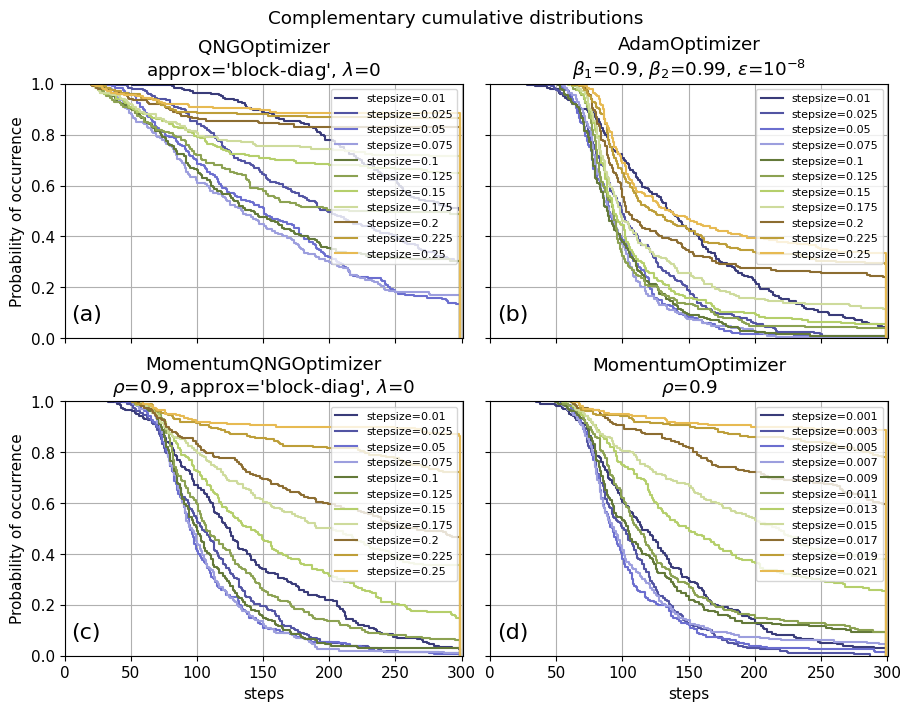

In [9]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 11

fig = plt.figure(figsize=(9, 7), layout="compressed")
axs = fig.subplots(2, 2, sharex=True, sharey=True)

# Cumulative distributions.
cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 20))

for j,stepsize in enumerate(sessions[0]["stepsizes"]):
    axs[0][0].ecdf(sessions_steps[0][j],complementary=True, color=colors[j], label="stepsize="+str(stepsize) )
for j,stepsize in enumerate(sessions[1]["stepsizes"]):
    axs[0][1].ecdf(sessions_steps[1][j],complementary=True, color=colors[j], label="stepsize="+str(stepsize) )
for j,stepsize in enumerate(sessions[2]["stepsizes"]):
    axs[1][1].ecdf(sessions_steps[2][j],complementary=True, color=colors[j], label="stepsize="+str(stepsize) )
for j,stepsize in enumerate(sessions[3]["stepsizes"]):
    axs[1][0].ecdf(sessions_steps[3][j],complementary=True, color=colors[j], label="stepsize="+str(stepsize) )

session_id = [0,1,3,2]

axs[0][0].text(5,0.07,"(a)",fontsize=16)
axs[0][1].text(5,0.07,"(b)",fontsize=16)
axs[1][0].text(5,0.07,"(c)",fontsize=16)
axs[1][1].text(5,0.07,"(d)",fontsize=16)
fig.suptitle("Complementary cumulative distributions")
for i in range(2):
    for j in range(2):
        axs[j][i].grid(True)
        axs[j][i].set_xlabel("steps")
        axs[j][i].set_ylabel("Probability of occurrence")
        axs[j][i].label_outer()
        axs[j][i].set_xlim(0.0, 301)
        axs[j][i].legend(loc="upper right",fontsize=8)
        session = sessions[session_id[i*2+j]]
        title = session["optimizer"]
        if(len(session["params_name"]) > 0):
            title += "\n" + session["params_name"]
        axs[i][j].set_title(title)

plt.show()
#fig.savefig(prefix_name + "steps_ccdf.png",format='png',dpi=300)
fig.savefig(prefix_name + "steps_ccdf.pdf",format='pdf',dpi=300)
#fig.savefig(prefix_name + "steps_ccdf.eps",format='eps',dpi=300)

In [10]:
!pip install torch

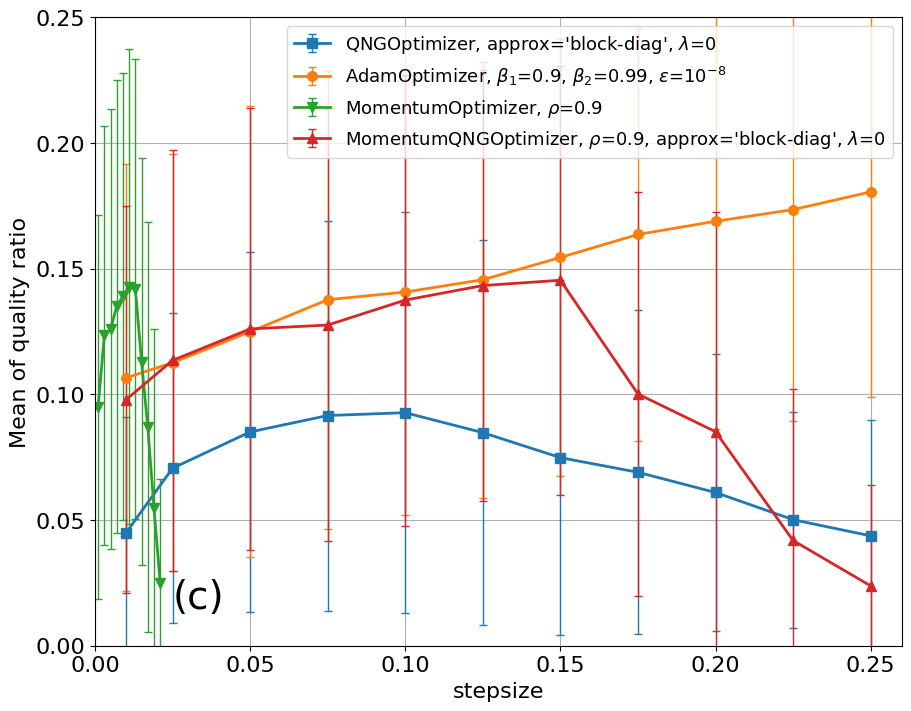

In [11]:
import matplotlib as mpl
import statistics
import math
import torch

mpl.rcParams['font.size'] = 16

cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 20))
fig = plt.figure(figsize=(9, 7), layout="compressed")
axs = fig.subplots(1, 1, sharex=True, sharey=True)
axs.text(0.025,0.015,"(c)",fontsize=28)
format_plot = ["s-","o-","v-","^-"]
for i,session in enumerate(sessions):
    ave_session = []
    stdev_session = []
    for j,stepsize in enumerate(session["stepsizes"]):
        quality = []
        for k in range(init_count):
            quality.append(float(sessions_quality[i][j][k]))
        ave_val = statistics.mean(quality)
        stdev_val = statistics.stdev(quality)
        ave_session.append(ave_val)
        if(stdev_val == 'NaN'):
            stdev_val = 0
        stdev_session.append(stdev_val)
    label = session["optimizer"]
    if(len(session["params_name"]) > 0):
        label += ", " + session["params_name"]
    axs.errorbar(session["stepsizes"],ave_session,yerr=stdev_session,elinewidth=1,label=label,capsize=3,fmt=format_plot[i],ms=7,lw=2)

    axs.grid(True)
    axs.legend(fontsize=13)
    axs.set_xlabel("stepsize")
    axs.set_ylabel("Mean of quality ratio")
    #axs.label_outer()
    axs.set_xlim(0.0, 0.26)
    axs.set_ylim(0.0, 0.25)
plt.show()
#fig.savefig(prefix_name+"_ave_quality.png",format='png',dpi=300)
fig.savefig(prefix_name+"_ave_quality.pdf",format='pdf',dpi=300)
#fig.savefig(prefix_name+"_ave_quality.eps",format='eps',dpi=300)

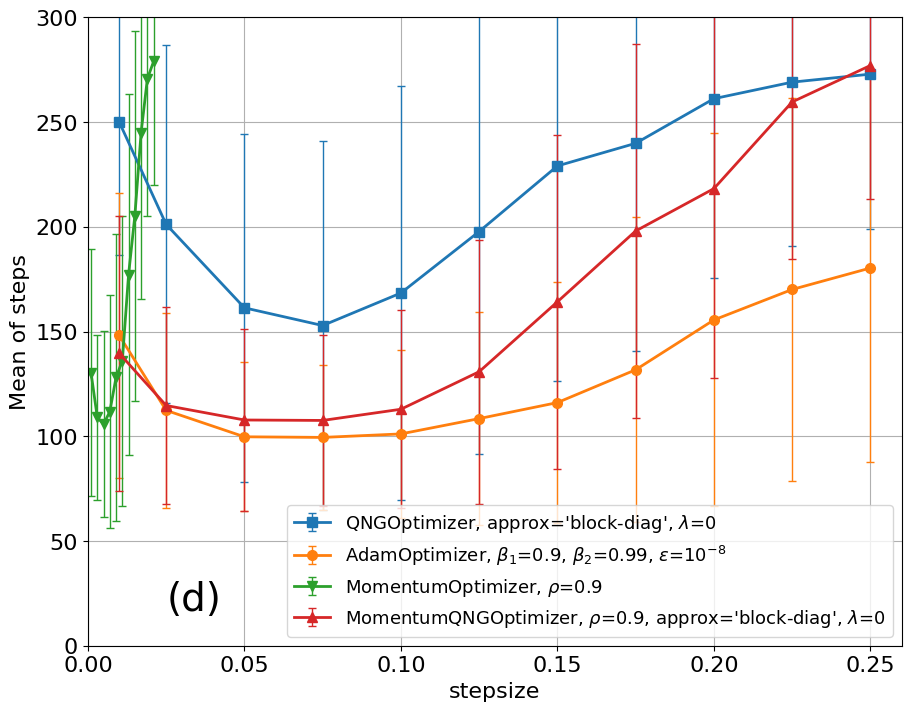

In [12]:
import matplotlib as mpl
import statistics
import math
import torch

cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 20))
fig = plt.figure(figsize=(9, 7), layout="compressed")
axs = fig.subplots(1, 1, sharex=True, sharey=True)
axs.text(0.025,17.0,"(d)",fontsize=28)
format_plot = ["s-","o-","v-","^-"]
for i,session in enumerate(sessions):
    ave_session = []
    stdev_session = []
    for j,stepsize in enumerate(session["stepsizes"]):
        arr_steps = []
        for k in range(init_count):
            arr_steps.append(float(sessions_steps[i][j][k]))
        ave_val = statistics.mean(arr_steps)
        stdev_val = statistics.stdev(arr_steps)
        ave_session.append(ave_val)
        if(stdev_val == 'NaN'):
            stdev_val = 0
        stdev_session.append(stdev_val)
    label = session["optimizer"]
    if(len(session["params_name"]) > 0):
        label += ", " + session["params_name"]
    axs.errorbar(session["stepsizes"],ave_session,yerr=stdev_session,elinewidth=1,label=label,capsize=3,fmt=format_plot[i],ms=7,lw=2)

    axs.grid(True)
    axs.legend(fontsize=13)
    axs.set_xlabel("stepsize")
    axs.set_ylabel("Mean of steps")
    #axs.label_outer()
    axs.set_xlim(0.0, 0.26)
    axs.set_ylim(0.0, 300)
plt.show()
#fig.savefig(prefix_name+"_ave_steps.png",format='png',dpi=300)
fig.savefig(prefix_name+"_ave_steps.pdf",format='pdf',dpi=300)
#fig.savefig(prefix_name+"_ave_steps.eps",format='eps',dpi=300)

In [13]:
from datetime import date
import ipynbname
depth = 4

start_name = ipynbname.name() + "_"
tail_name = "_depth=" + str(depth)+"_" + str(date.today()) + ".dat"
with open(start_name + "quality" + tail_name, "w") as file:
    for j in range(len(init_params_array)):
        line = ""
        for i in range(len(sessions)):
            for k in range(len(sessions[i]["stepsizes"])):
                line += str(sessions_quality[i][k][j]) + " "
        print(j,line,file=file)

with open(start_name + "costs" + tail_name, "w") as file:
    for j in range(len(init_params_array)):
        line = ""
        for i in range(len(sessions)):
            for k in range(len(sessions[i]["stepsizes"])):
                line += str(sessions_costs[i][k][j]) + " "
        print(j,line,file=file)

with open(start_name + "steps" + tail_name, "w") as file:
    for j in range(len(init_params_array)):
        line = ""
        for i in range(len(sessions)):
            for k in range(len(sessions[i]["stepsizes"])):
                line += str(sessions_steps[i][k][j]) + " "
        print(j,line,file=file)

with open(start_name + "asym" + tail_name, "w") as file:
    for j in range(len(init_params_array)):
        line = ""
        for i in range(len(sessions)):
            for k in range(len(sessions[i]["stepsizes"])):
                line += str(sessions_asym[i][k][j]) + " "
        print(j,line,file=file)

with open(start_name + "params" + tail_name, "w") as file:
    for j in range(len(init_params_array)):
        line = ""
        for i in range(len(sessions)):
            for k in range(len(sessions[i]["stepsizes"])):
                line += str(sessions_params[i][k][j][0]) + " " + str(sessions_params[i][k][j][1]) + " "
        print(j,line,file=file)


NameError: name 'init_params_array' is not defined